In [75]:
## Packages
'''Import all the necessary packages and modules'''

import numpy as np # package for playing with matrices
from scipy import signal as ss
import matplotlib.pyplot as plt
import sys, os # python modules for interacting with computer
from tkinter import filedialog # interface for opening a file explorer
from tkinter import * # * imports all files in tkinter 
import pandas as pd # useful for keeping cell structure and 2d data manipulation
import glob # helps find path 

In [4]:
## Data Directory GUI
'''Getting data directory so data can easily be imported 
using this format data = hs.load('*.dm3', stack=True) to import all dm3s in folder as a stack'''

root = Tk() # Tk() is a function in tkinter that opens a window
root.directory = filedialog.askdirectory() # opens explorer window so you can find the folder of choice
#root.file = fieldialog.askopenfilename()
root.withdraw() # closes the tkinter window since it's unnecessary
oldcwd = os.getcwd() # saves old called working directory (place where data is drawn from) as oldcwd use os.chdir(oldcwd) to go back
os.chdir(root.directory) # sets new directory
newcwd = os.getcwd() # saves new directory name as newcwd

In [5]:
## Load Data
''' Open data and set up for analysis'''
path = root.directory + '/*.csv' # creates path to data set folder directory. Change .csv to file type as needed
a=0 # counter for looping through list starting at 0
file_list=glob.glob(path)
num_files = np.size(file_list) # number of files in the directory with the correct file type
file_shape = np.array(pd.read_csv(glob.glob(path)[0]).values.shape) # data file size
Header = 4 #Removes string header to work with numpy array
file_shape[0]=file_shape[0]-Header # new file shape after removal of header
matrix_shape = np.append(file_shape, num_files) # size of matrix to hold all data
data_array = np.empty(matrix_shape) # builds empty matrix of size matrix_shape
for fname in file_list: #iterates through files along order of glob.glob(path)

    data = pd.read_csv(fname) # uses pandas to open files and keep structure
    data=data.drop(data.index[0:Header]) #Removes rows of header
    datapd = data.values # converts from dataframe to numpy array
    
    data_array[:,:,a] = datapd # inserts each file as new layer of matrix along z axis (axis=2)
    a+=1 # increase counter to progress through list
    

In [ ]:
file_list

In [69]:
for_counter = np.arange(2,num_files-2,2)
a=0
num_cables=7
new_file_shape=file_shape[1]-1
new_file_shape=np.append(file_shape[0],new_file_shape)
cable_data_matrix = np.append(new_file_shape,num_cables)
data_Ac_1=np.empty(cable_data_matrix)  #preallocates matrix size
data_Bc_1=np.empty(cable_data_matrix)
data_A_1=np.empty(cable_data_matrix)
data_A_2=np.empty(cable_data_matrix)
data_B_1=np.empty(cable_data_matrix)
data_B_2=np.empty(cable_data_matrix)


for counter in for_counter:
    
    data_Ac_1[:,0,a]=data_array[:,0,counter] # Cable x data
    data_Ac_1[:,1,a]=data_array[:,1,counter] # Cable y data
    data_A_1[:,0,a]=data_array[:,0,counter] # Cable1 and holder for A series x data   
    data_A_2[:,0,a]=data_array[:,0,counter] # Cable2 and holder for A series x data  
    data_A_1[:,1,a]=data_array[:,1,counter]-data_array[:,1,0] # Holder-Cable1 for A series y data 
    data_A_2[:,1,a]=data_array[:,1,counter]-data_array[:,1,1] # Holder-Cable2 for A series y data 
    data_B_1[:,0,a]=data_array[:,0,counter+1] # Cable1 and holder for A series x data  
    data_B_2[:,0,a]=data_array[:,0,counter+1] # Cable2 and holder for A series x data
    data_B_1[:,1,a]=data_array[:,1,counter+1]-data_array[:,1,0] # Holder-Cable1 for A series y data 
    data_B_2[:,1,a]=data_array[:,1,counter+1]-data_array[:,1,1] # Holder-Cable2 for A series y data 
    a+=1
    


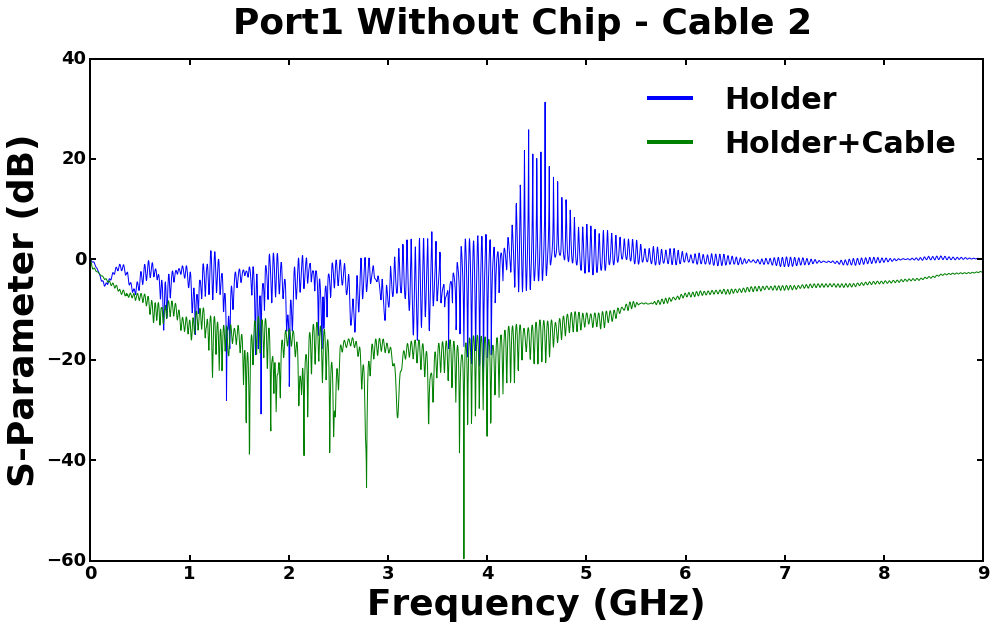

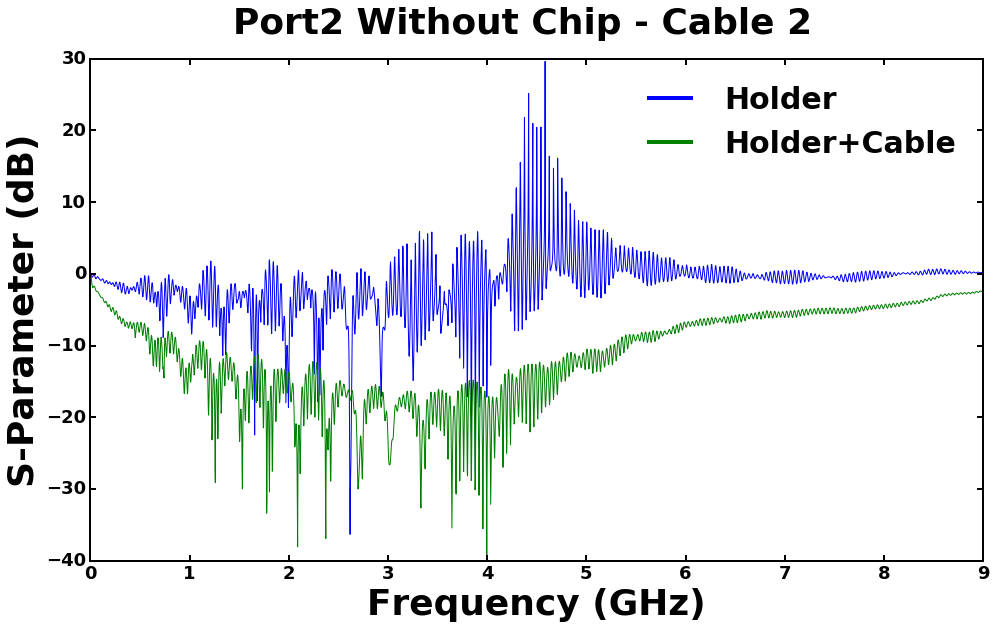

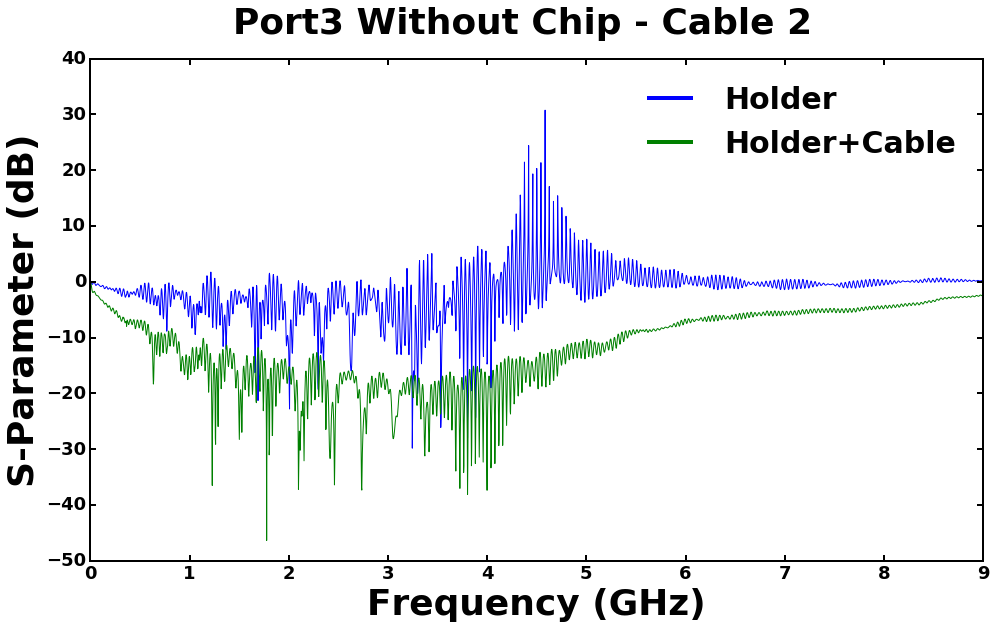

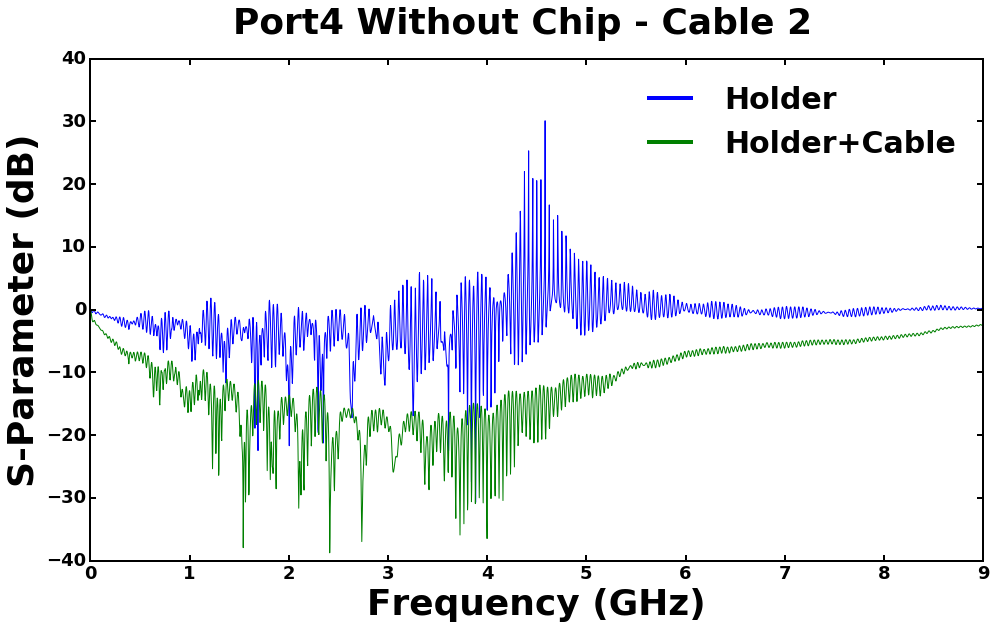

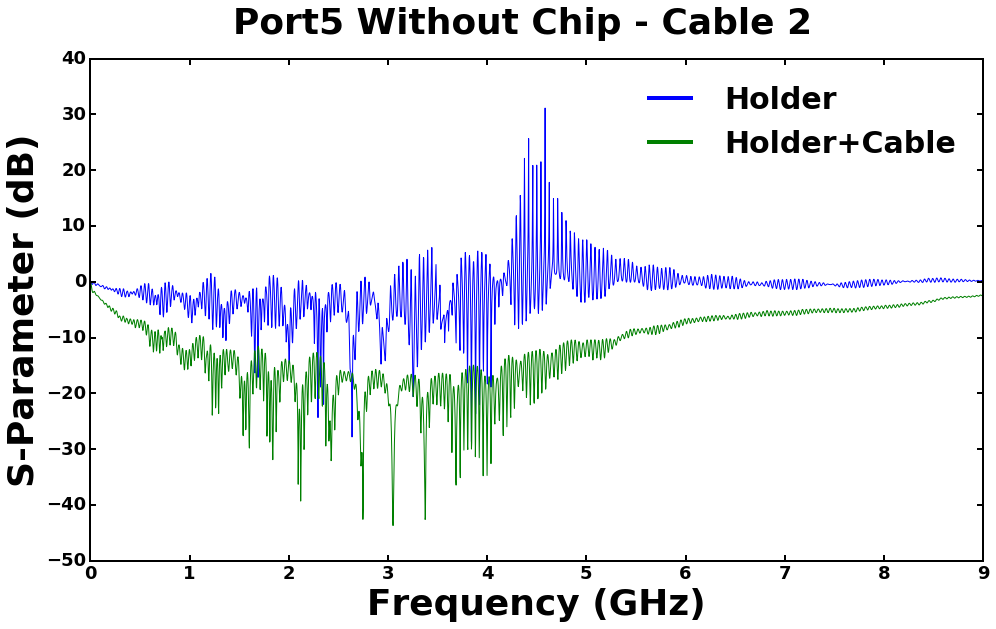

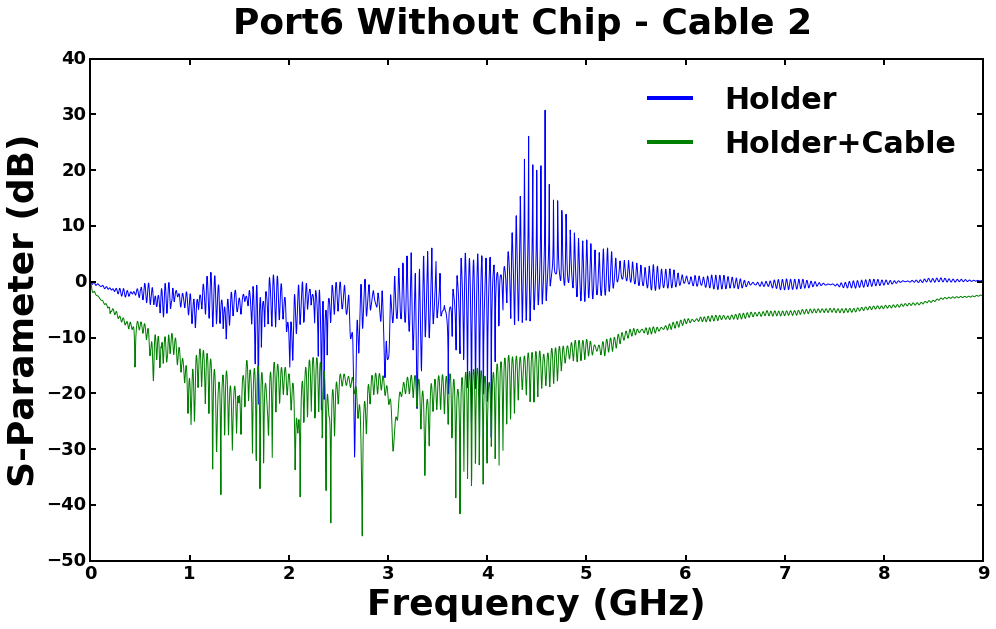

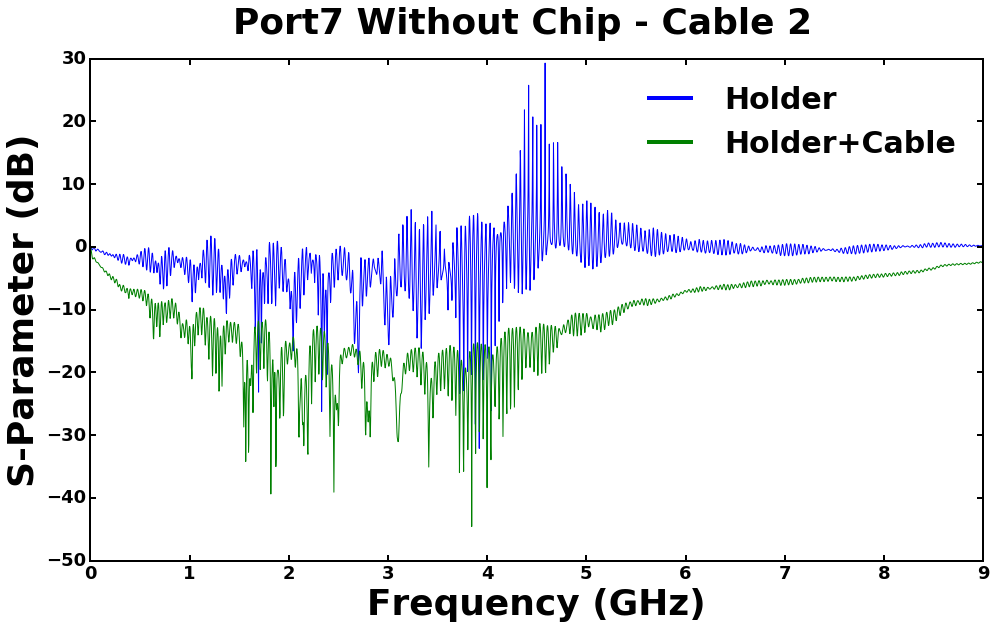

In [70]:
plot_file=np.arange(0,7)
data_array_order=[2,4,6,8,10,12,14] #Used for plotting A experiments
#data_array_order=[3,5,7,9,11,13,15] #Used for plotting B experiments
for n in plot_file:
    x=data_array[:,0,data_array_order[n]]
    y=data_array[:,1,data_array_order[n]]
    

    #X=data_A_2[:,0,plot_file[n]] #Used for plotting A experiments as data_A_R, R=1,2
    #Y=data_A_2[:,1,plot_file[n]] #Used for plotting A experiments as data_A_R, R=1,2
    
    X=data_B_2[:,0,plot_file[n]] #Used for plotting B experiments as data_B_R, R=1,2
    Y=data_B_2[:,1,plot_file[n]] #Used for plotting B experiments as data_B_R, R=1,2
    
    name_fix=plot_file[n]+1
    plot_file_name=str(name_fix)
    Data_Name = 'Port' + plot_file_name + ' Without Chip - Cable 2' #Change name whether R=1,2 and With to Without if A or B

    plt.rc('font', weight='bold')
    plt.rcParams['axes.linewidth']=2
    plt.rcParams['figure.figsize'] = (16,9)

    fig = plt.figure()
    fig.suptitle(Data_Name, fontsize=36, fontweight='bold')

    ax = fig.add_subplot(111)

    ax.set_xlabel('Frequency (GHz)', fontsize=36, fontweight='bold')
    ax.set_ylabel('S-Parameter (dB)', fontsize=36, fontweight='bold')

    ax.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
    ax.tick_params(axis='both', which='minor', labelsize=18, width=2, length=6)
    ax.xaxis.get_offset_text().set_visible(False)

    fig=plt.plot(X[1:-1],Y[1:-1],'b-',label='Holder')
    fig=plt.plot(X[1:-1],y[1:-1],'g-',label='Holder+Cable')
    

    leg=plt.legend(fontsize=30, loc='best', frameon=False)

    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)

    plt.show()
    #save_loc=root.directory+'/'+Data_Name+'.png'
    #plt.savefig(save_loc)

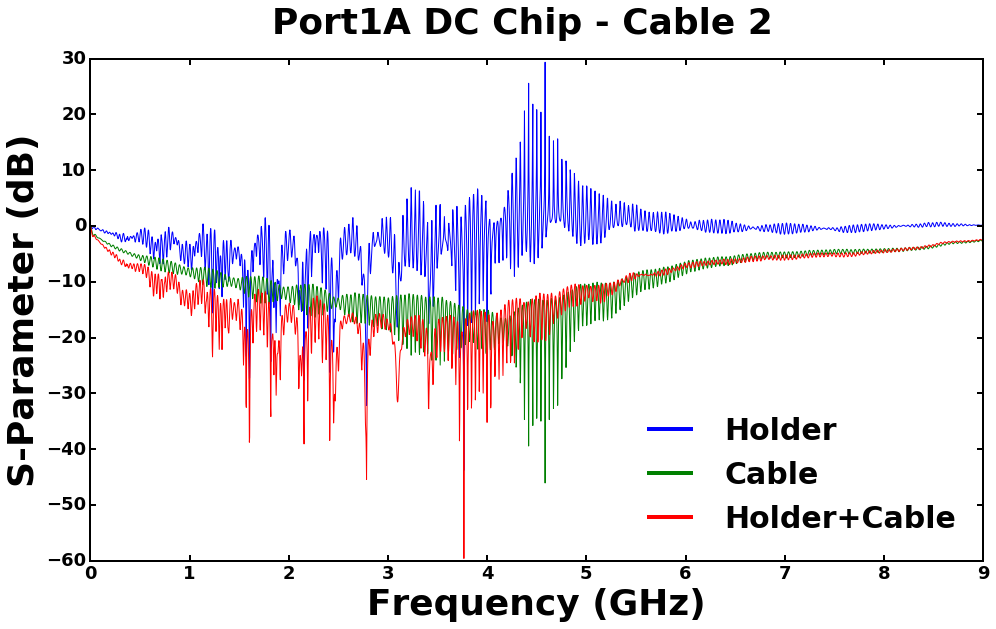

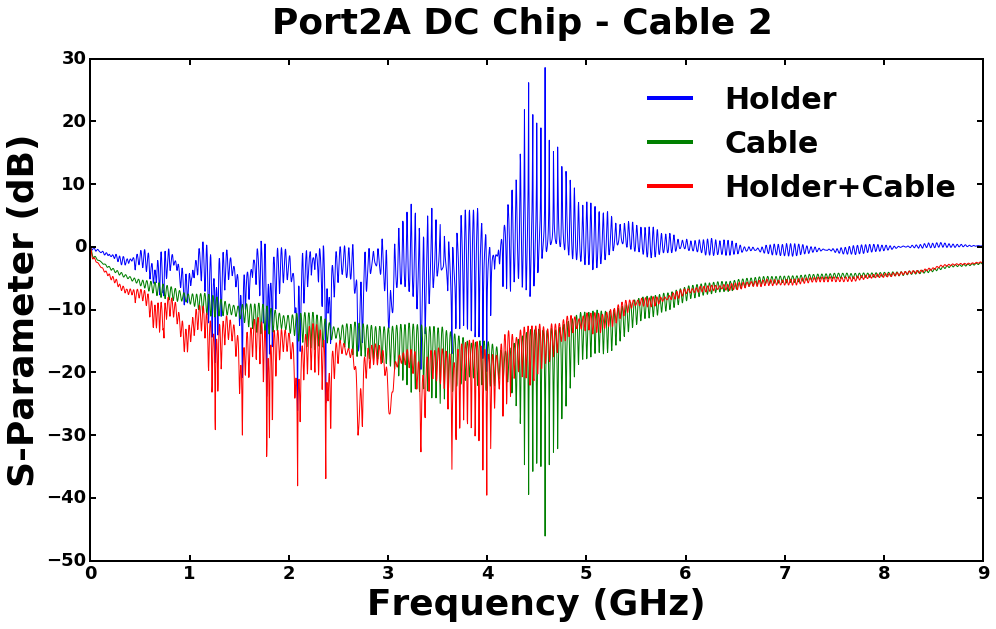

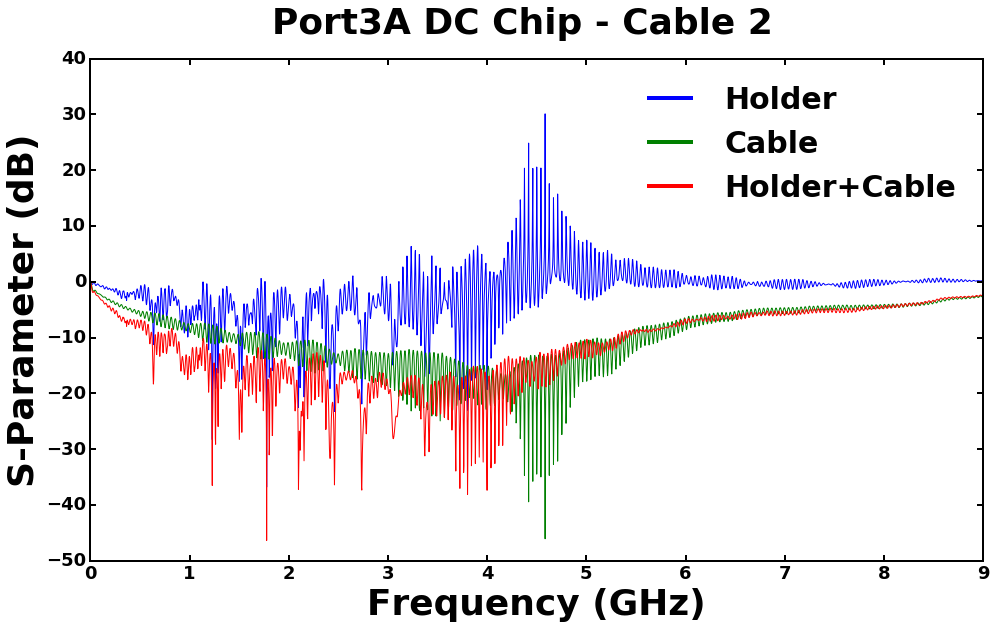

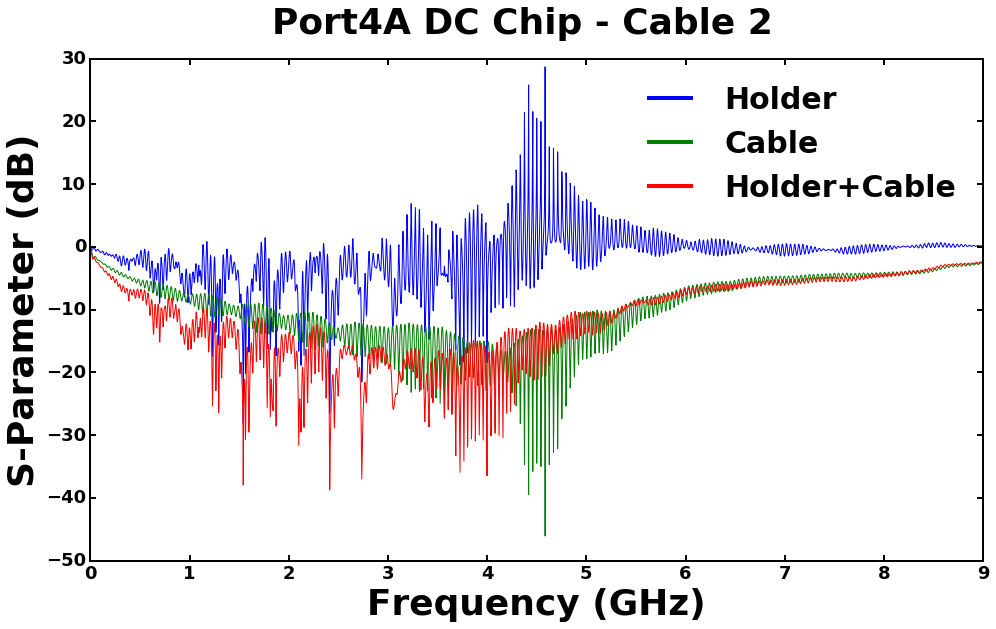

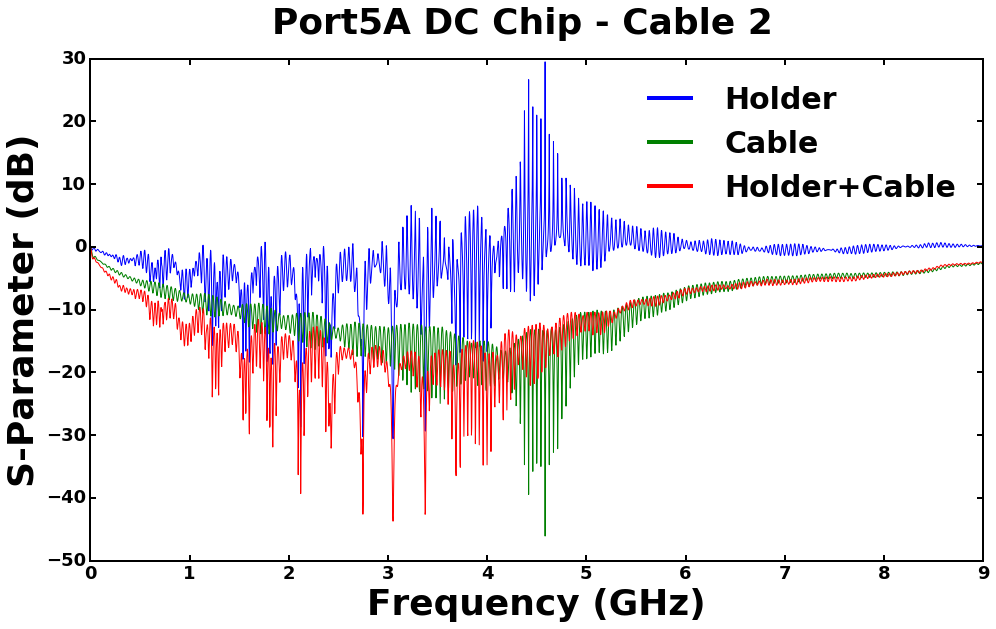

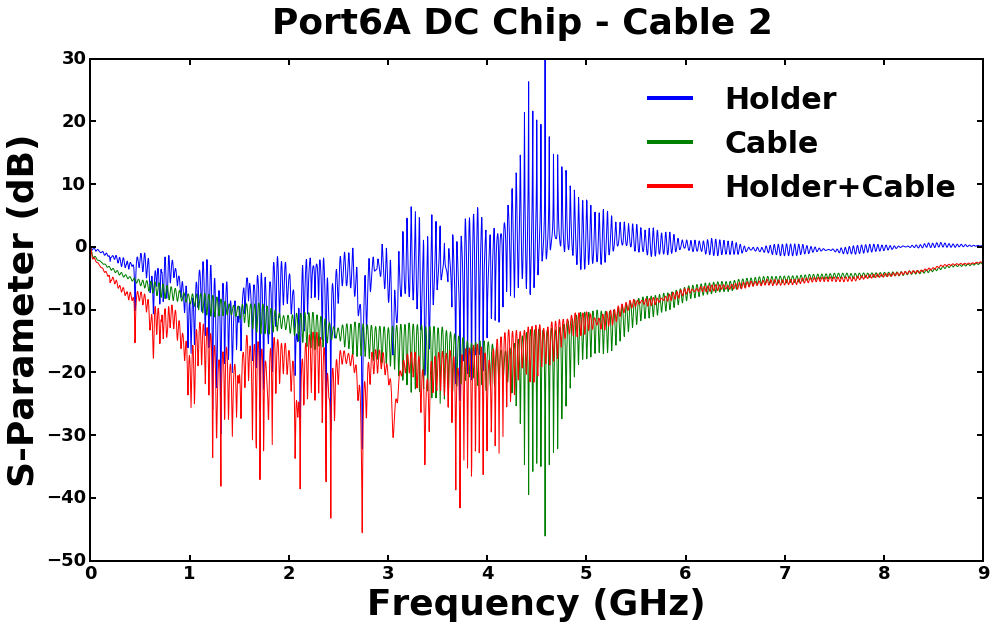

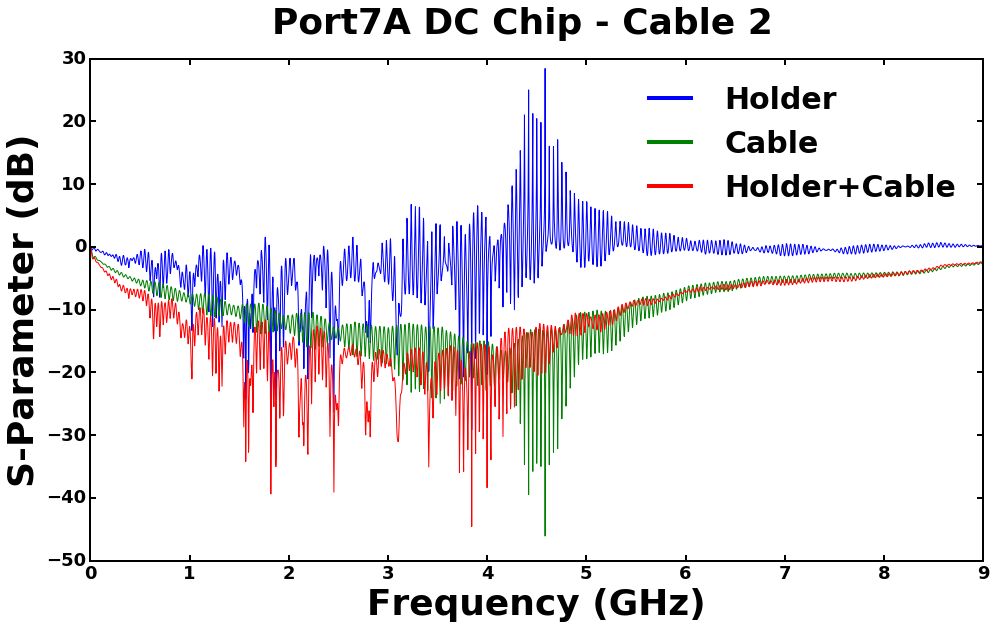

In [71]:
plot_file=np.arange(0,7)

data_array_order=[2,4,6,8,10,12,14] #Used for plotting A experiments
data_array_order1=[3,5,7,9,11,13,15] #Used for plotting B experiments
for n in plot_file:

    #X=data_A_2[:,0,plot_file[n]] #Used for plotting A experiments as data_A_R, R=1,2
    #Y=data_A_2[:,1,plot_file[n]] #Used for plotting A experiments as data_A_R, R=1,2
    
    X=data_A_2[:,0,plot_file[n]] #Used for plotting B experiments as data_B_R, R=1,2
    YA=data_A_2[:,1,plot_file[n]] #Used for plotting B experiments as data_B_R, R=1,2
    YB=data_B_2[:,1,plot_file[n]]
    y1c=data_Ac_1[:,1,plot_file[n]]
    y1=data_array[:,1,1] #0 for cable 1 and 1 for cable 2 in the z position
    
    Y=YA-YB    
    
    name_fix=plot_file[n]+1
    plot_file_name=str(name_fix)
    Data_Name = os.path.basename(file_list[data_array_order[n]]).split('.')[0] + ' DC Chip - Cable 2' #Change name whether R=1,2 and With to Without if A or B

    plt.rc('font', weight='bold')
    plt.rcParams['axes.linewidth']=2
    plt.rcParams['figure.figsize'] = (16,9)

    fig = plt.figure()
    fig.suptitle(Data_Name, fontsize=36, fontweight='bold')

    ax = fig.add_subplot(111)

    ax.set_xlabel('Frequency (GHz)', fontsize=36, fontweight='bold')
    ax.set_ylabel('S-Parameter (dB)', fontsize=36, fontweight='bold')

    ax.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
    ax.tick_params(axis='both', which='minor', labelsize=18, width=2, length=6)
    ax.xaxis.get_offset_text().set_visible(False)

    #fig=plt.plot(X,Y,'k-',label='Chip')
    fig=plt.plot(X,YA,'b-',label='Holder')
    fig=plt.plot(X,y1,'g-',label='Cable')
    fig=plt.plot(X,y1c,'r-',label='Holder+Cable')
    
    

    leg=plt.legend(fontsize=30, loc='best', frameon=False)

    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)

    plt.show()
    #save_loc=root.directory+'/'+Data_Name+'.png'
    #plt.savefig(save_loc)

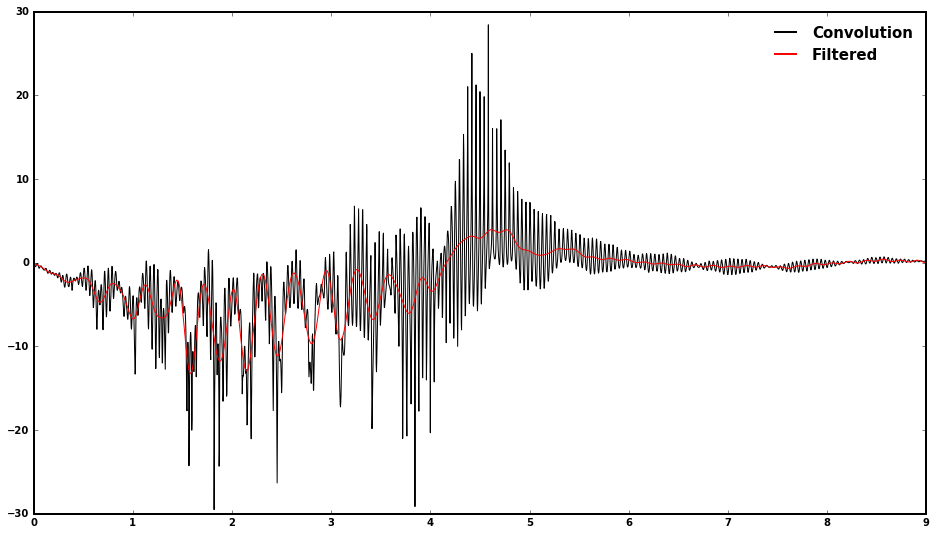

In [158]:
def normalize(raw):
    norm=[]
    for i in raw:
        if i<0:
            norm.append(-i/min(raw))
        elif i>0:
            norm.append(i/max(raw))
        else:
            norm.append(i)
    return norm
def lowpass_filter(YA,sample_range,filter_size): #YA data set, measured sample range, filter_size arbitrary frequency cutoff based on number of samples
                   
    r=YA.shape[0]                   
    s=sample_range #GHz
    z=np.fft.fftfreq(r)/(2*s)*r
    B=filter_size
    e=int((B)/z[1])
    t=np.linspace(0, s, r)

    fYA=np.fft.rfft(YA)
    filter_e=e
    fYAr=np.zeros(fYA.shape[0])
    fYAl=np.zeros(fYA.shape[0])
    fYAr[:filter_e]=np.real(fYA[:filter_e])
    fYAl[:filter_e]=np.imag(fYA[:filter_e])
    fYA_filt=np.array(fYAr)+np.array(1j*fYAl)
    ifY=np.fft.irfft(fYA_filt)
    return ifY
    
filtered_YA = lowpass_filter(YA, 9,3)

index_start=  0
index_stop = int(r-1)

#plt.plot(t1[index_start:index_stop],a[index_start:index_stop], 'b-',linewidth=2, label='Filter') # sinc
#plt.plot(t[index_start:index_stop],normalize(b[index_start:index_stop]),'g-', linewidth=2, label='Input') # input signal
plt.plot(t[index_start:index_stop],YA[index_start:index_stop],'k-', label='Convolution' ) # convoluted#
plt.plot(t[index_start:index_stop],filtered_YA[index_start:index_stop],'r-', label='Filtered' ) # convoluted
leg=plt.legend(fontsize=15, loc='best', frameon=False)

for legobj in leg.legendHandles:
    legobj.set_linewidth(2.0)

C:\Users\kbs1\AppData\Local\Continuum\anaconda3\envs\HyperSpy\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


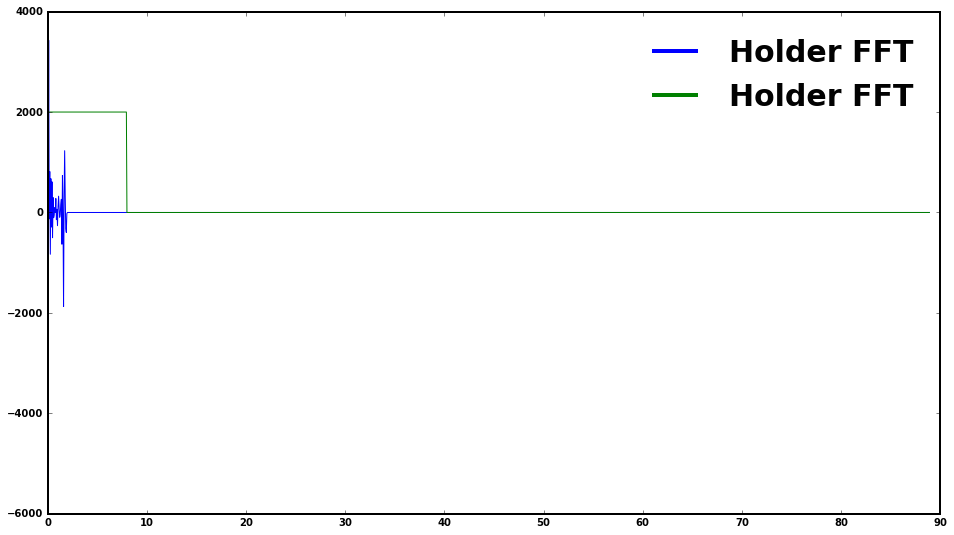

In [152]:

fig1=plt.plot(z[0:fYA_filt.shape[0]],fYA_filt,'b-', label='Holder FFT')
fig1=plt.plot(z[0:fYA.shape[0]],efft[0:fYA.shape[0]],'g-', label='Holder FFT')
#fig1=plt.plot(fX,fY,'g-', label='Cable FFT')
#fig1=plt.plot(fX,fY1c,'r-', label='Cable + Holder FFT')
leg=plt.legend(fontsize=30, loc='best', frameon=False)

for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)
    
#plt.ylim(ymax=1500)  # adjust the max leaving min unchanged
#plt.ylim(ymin=-1500)  # adjust the min leaving max unchanged
#plt.xlim(xmax=.2)  # adjust the max leaving min unchanged
#plt.xlim(xmin=0)  # adjust the min leaving max unchanged
plt.show()

In [149]:
st=np.std(fY)
Num_stds=2
maxima=fY[fY>Num_stds*st]
minima=fY[fY<-Num_stds*st]


b=np.empty(maxima.shape[0])
c=np.empty(minima.shape[0])

for i in np.arange(maxima.shape[0]):
    
    b[np.int(i)]=np.nonzero(fY==maxima[np.int(i)])[0][0]
    print('Maximum values of ' + str(fX[b[np.int(i)]]))
    
for i in np.arange(minima.shape[0]):
    
    c[i]=np.nonzero(fY==minima[i])[0][0]
    print('Minimum values of ' + str(fX[c[i]]))

Maximum values of 3.55559506217e-07
Maximum values of 1.06667851865e-06
Maximum values of 7.57341748242e-05
Minimum values of 0.0
Minimum values of 7.60897343304e-05


C:\Users\kbs1\AppData\Local\Continuum\anaconda3\envs\HyperSpy\lib\site-packages\ipykernel_launcher.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  del sys.path[0]
C:\Users\kbs1\AppData\Local\Continuum\anaconda3\envs\HyperSpy\lib\site-packages\ipykernel_launcher.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


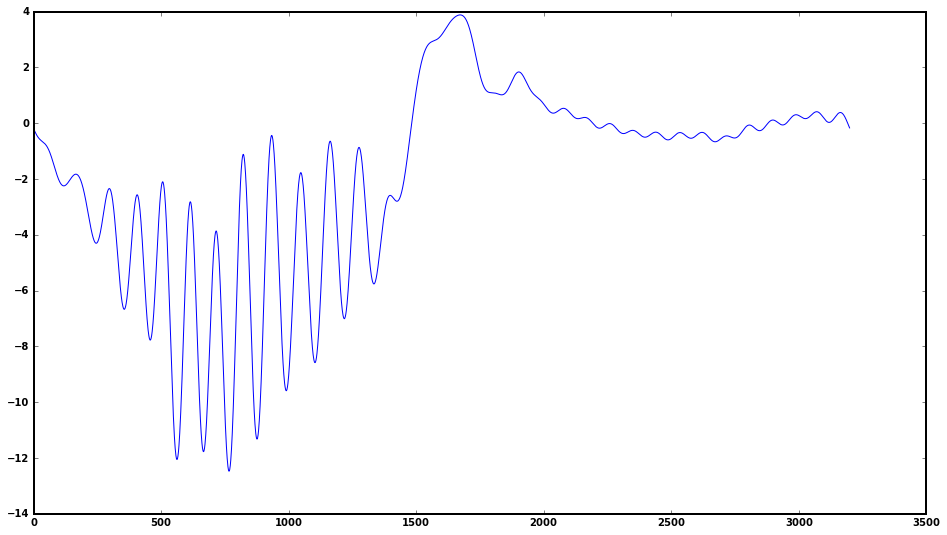

In [153]:
ifY=np.fft.irfft(fYA_filt)
plt.plot(ifY)

In [ ]:
#fig2=plt.plot(X[0:-1],ifY,'b-')
fig2=plt.plot(fX,fY, 'k-')
plt.show()

In [146]:
e=int(8/z[1])
efft=np.ones(z.shape[0])
efft[e:-1]=0
efft[-1]=0
efft=efft*2000
